<a href="https://colab.research.google.com/github/svats0029/stock-market-and-nbr-recgnization/blob/main/stockmarketusing_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close, errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
X_train = []
Y_train = []

for i in range (60,1149): # : timestamp // 1149 : length of the data
     X_train.append(trainData[i-60:i,0])
     Y_train.append(trainData[i,0])
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, Y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 17s - loss: 0.0512 - 17s/epoch - 491ms/step
Epoch 2/20
35/35 - 9s - loss: 0.0119 - 9s/epoch - 262ms/step
Epoch 3/20
35/35 - 17s - loss: 0.0101 - 17s/epoch - 483ms/step
Epoch 4/20
35/35 - 14s - loss: 0.0088 - 14s/epoch - 387ms/step
Epoch 5/20
35/35 - 15s - loss: 0.0085 - 15s/epoch - 419ms/step
Epoch 6/20
35/35 - 14s - loss: 0.0077 - 14s/epoch - 393ms/step
Epoch 7/20
35/35 - 16s - loss: 0.0074 - 16s/epoch - 465ms/step
Epoch 8/20
35/35 - 13s - loss: 0.0090 - 13s/epoch - 376ms/step
Epoch 9/20
35/35 - 12s - loss: 0.0072 - 12s/epoch - 355ms/step
Epoch 10/20
35/35 - 13s - loss: 0.0079 - 13s/epoch - 369ms/step
Epoch 11/20
35/35 - 11s - loss: 0.0071 - 11s/epoch - 323ms/step
Epoch 12/20
35/35 - 9s - loss: 0.0059 - 9s/epoch - 247ms/step
Epoch 13/20
35/35 - 8s - loss: 0.0069 - 8s/epoch - 241ms/step
Epoch 14/20
35/35 - 8s - loss: 0.0059 - 8s/epoch - 217ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0055 - 8s/epoch - 230ms/step
Epoch 16/20
35/35 - 9s - loss: 0.0052 - 9s/epoch - 249ms/st

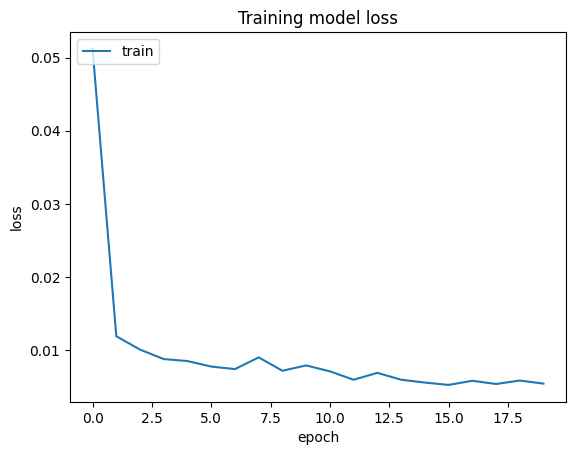

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('Google_test_data.csv')
#estData = pd.read_csv('Google_test_data.csv', error_bad_lines=False)

testData.iloc[:, 1]=pd.to_numeric(testData.iloc[:, 1],errors='coerce')
testData = testData.dropna()
#testData = testData.iloc[:4,:5]
y_test = testData.iloc[60:, 1].values
#input array for the model
inputClosing = testData.iloc[:, 1].values
print(type(inputClosing))
sc=StandardScaler()
#sc.fit(inputClosing)
inputClosing_scaled = sc.fit_transform(inputClosing.reshape(-1, 1))
inputClosing_scaled.shape
timestep = 60
X_test = []
length = len(testData)
#print(len(input))
'''for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))'''
for i in range(timestep, len(inputClosing_scaled)):
    if i < len(inputClosing_scaled):
        X_test.append(inputClosing_scaled[i - timestep:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape


<class 'numpy.ndarray'>


(192, 60, 1)

In [ ]:
#model = Sequential()
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 0s 2ms/step


array([[[ 1.6399306 ],
        [ 1.6119876 ],
        [ 1.5194196 ],
        ...,
        [-0.8761372 ],
        [-0.9084516 ],
        [-1.2008322 ]],

       [[ 1.6119876 ],
        [ 1.5194196 ],
        [ 1.4487044 ],
        ...,
        [-0.9084516 ],
        [-1.2008322 ],
        [-1.4431045 ]],

       [[ 1.5194196 ],
        [ 1.4487044 ],
        [ 1.0943513 ],
        ...,
        [-1.2008322 ],
        [-1.4431045 ],
        [-0.982288  ]],

       ...,

       [[-0.21941252],
        [ 0.5086523 ],
        [ 0.57046854],
        ...,
        [ 0.48992074],
        [ 0.37580848],
        [ 0.79463226]],

       [[ 0.5086523 ],
        [ 0.57046854],
        [ 0.19628997],
        ...,
        [ 0.37580848],
        [ 0.79463226],
        [ 1.031285  ]],

       [[ 0.57046854],
        [ 0.19628997],
        [ 0.25857493],
        ...,
        [ 0.79463226],
        [ 1.031285  ],
        [ 0.73812306]]], dtype=float32)

In [ ]:
#y_pred = model.predict(X_test)
y_pred_2d = y_pred.reshape(-1, 1)
predicted_price = sc.inverse_transform(y_pred_2d)

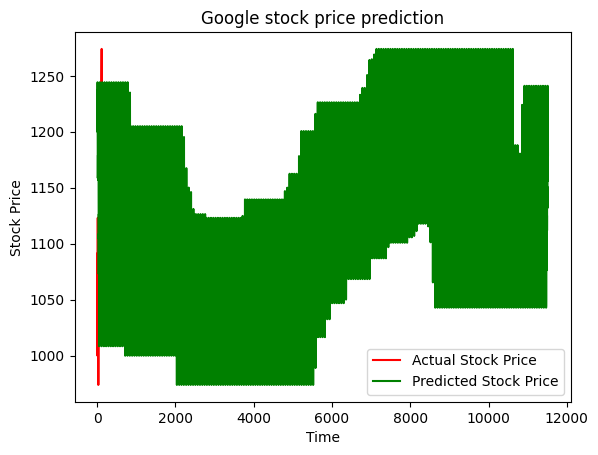

In [ ]:
plt.plot(y_test, color ='red', label = 'Actual Stock Price')
#plt.plot(y_test, color ='green', label = 'Predicted Stock Price')
plt.plot(predicted_price, color ='green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')

plt.legend(loc='lower right' )

plt.show()
